###  Bu işlem bir otel işlemleri üzerinden alınmış bir veri seti ve bunların rezarvasyon iptalleri üzerine odaklanmış bir çalışma

1. Veriye ilk bakış;
- Bu kısımda veriyi anlamaya yönelik ilk bakış işlemleri yapılıyor.

2. Veri Görselleştirme;
- Bu kısımda veriyi alt kırılmlarını anlama ve o kırılımları yorumlamaya yönelik bir çalışma.

3. Makine öğrenmesi;
- Bu kısımda bir model kurup sonrası yıllara yönelik tahmin işlemi yapma.

In [57]:
# Gereki kütüpanelrin importu.

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
# Uyarıları kapatma.

warnings.filterwarnings("ignore")

In [6]:
# Veri setini bağlama.

df = pd.read_csv(r"C:\Users\realb\Desktop\otel araştırması\hotel_bookings.csv")

### Veriye ilk bakış

In [7]:
df.head()

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-15


In [8]:
df.tail()

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,119385,City Hotel,0,23,2017,August,35,30,2,5,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06-09-17
119386,119386,City Hotel,0,102,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07-09-17
119387,119387,City Hotel,0,34,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07-09-17
119388,119388,City Hotel,0,109,2017,August,35,31,2,5,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07-09-17
119389,119389,City Hotel,0,205,2017,August,35,29,2,7,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,07-09-17


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,119390.0,59694.500000,34465.068657,0.00,29847.25,59694.500,89541.75,119389.0
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.00,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.00,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.00,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.00,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.00,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.00,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.00,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.00,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.00,10.0


In [17]:
df.describe()

,index,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,...,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,59694.500000,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,...,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,34465.068657,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,...,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,29847.250000,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,59694.500000,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,89541.750000,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,119389.000000,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,...,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [11]:
df.shape

(119390, 33)

In [12]:
df.dtypes

index                               int64
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                      

In [14]:
df.columns

Index(['index', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   index                           119390 non-null  int64  
 1   hotel                           119390 non-null  object 
 2   is_canceled                     119390 non-null  int64  
 3   lead_time                       119390 non-null  int64  
 4   arrival_date_year               119390 non-null  int64  
 5   arrival_date_month              119390 non-null  object 
 6   arrival_date_week_number        119390 non-null  int64  
 7   arrival_date_day_of_month       119390 non-null  int64  
 8   stays_in_weekend_nights         119390 non-null  int64  
 9   stays_in_week_nights            119390 non-null  int64  
 10  adults                          119390 non-null  int64  
 11  children                        119386 non-null  float64
 12  babies          

In [10]:
df.isnull().sum()

index                                  0
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent           

### Veri görselleştirme

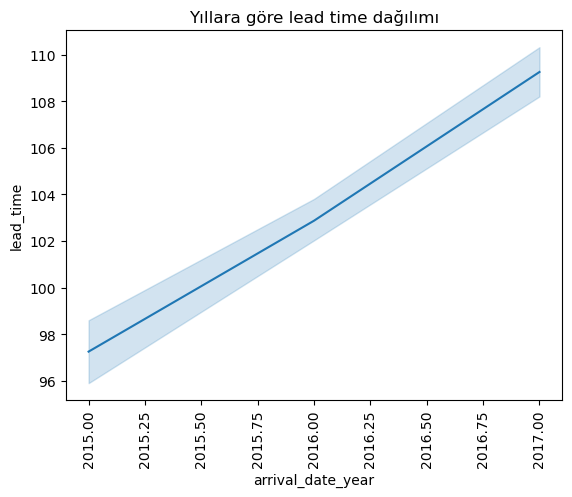

In [21]:
sns.lineplot(x = "arrival_date_year", y = "lead_time", data = df);
plt.title("Yıllara göre lead time dağılımı")
plt.xticks(rotation=90);

is_canceled
0    0.629584
1    0.370416
Name: proportion, dtype: float64


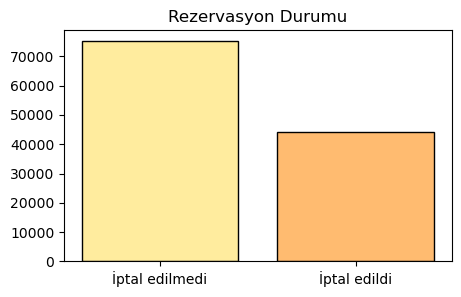

In [32]:
cancelled_perc = df['is_canceled'].value_counts(normalize=True)
print(cancelled_perc)

plt.figure(figsize = (5,3))
plt.title('Rezervasyon Durumu')
plt.bar(['İptal edilmedi' , 'İptal edildi'],df['is_canceled'].value_counts(), edgecolor = 'k', width = 0.8,color=colors)
plt.show()

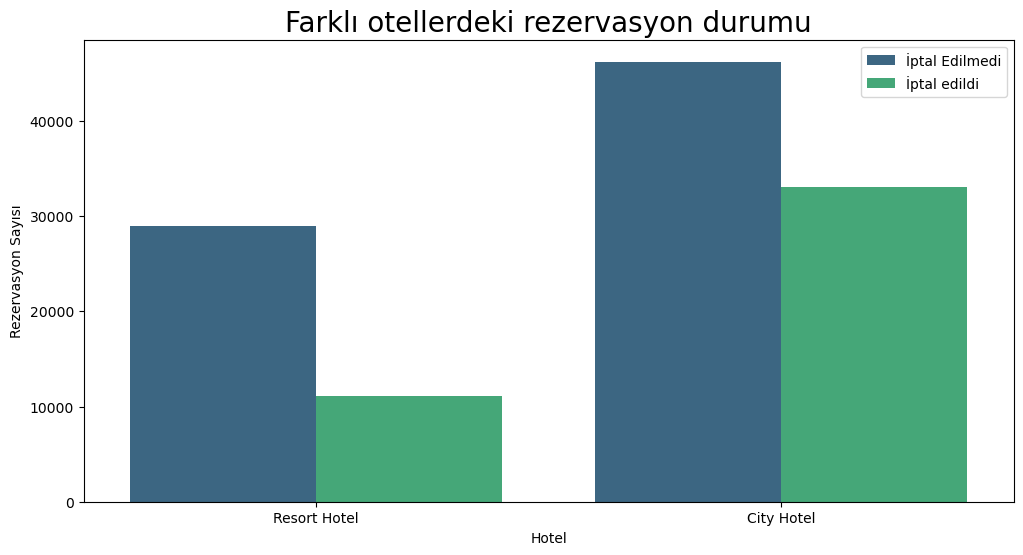

In [38]:
plt.figure(figsize=(12, 6))

# Sayım grafiğini oluşturun
ax1 = sns.countplot(x='hotel', hue='is_canceled', data=df, palette="viridis")

# Gösterge konumunu özelleştirin
legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1, 1))

# Çizim başlığını ve eksen etiketlerini ayarlayın
plt.title('Farklı otellerdeki rezervasyon durumu', size=20, color='Black')
plt.xlabel('Hotel',color='Black')
plt.ylabel('Rezervasyon Sayısı', color='Black')

# Gösterge etiketlerini özelleştirin
plt.legend(['İptal Edilmedi', 'İptal edildi'])

# Konuyu göster
plt.show()

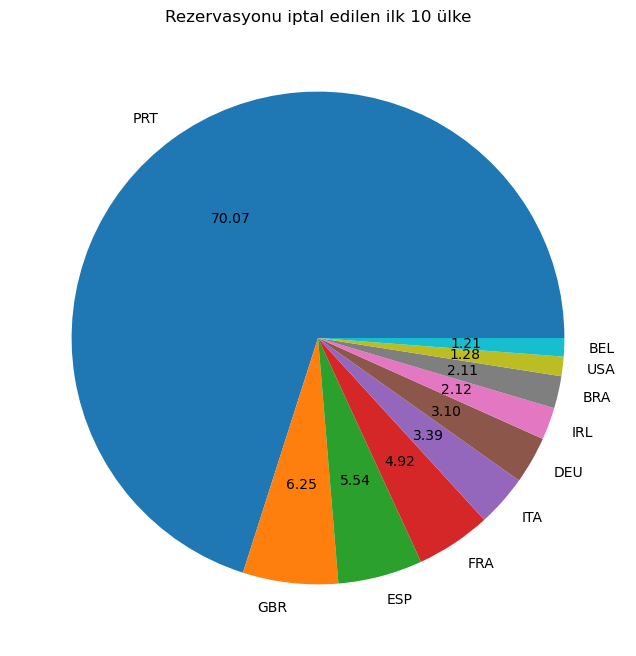

In [54]:
cancelled_data= df[df['is_canceled']==1]
top_10_country = cancelled_data['country'].value_counts()[:10]
# plt.figure(figsize=(8,8), facecolor='#C38154')
# plt.title('Top 10 countries with reservation canceled',color="black")
# plt.pie(top_10_country, autopct ='%.2f', labels = top_10_country.index)
# plt.show()

plt.figure(figsize=(8, 8))  # Set background color to a light brown
plt.title('Rezervasyonu iptal edilen ilk 10 ülke', color="black")
plt.pie(top_10_country, autopct='%.2f', labels=top_10_country.index)
plt.show()

### Makine Öğrenmesi modeli

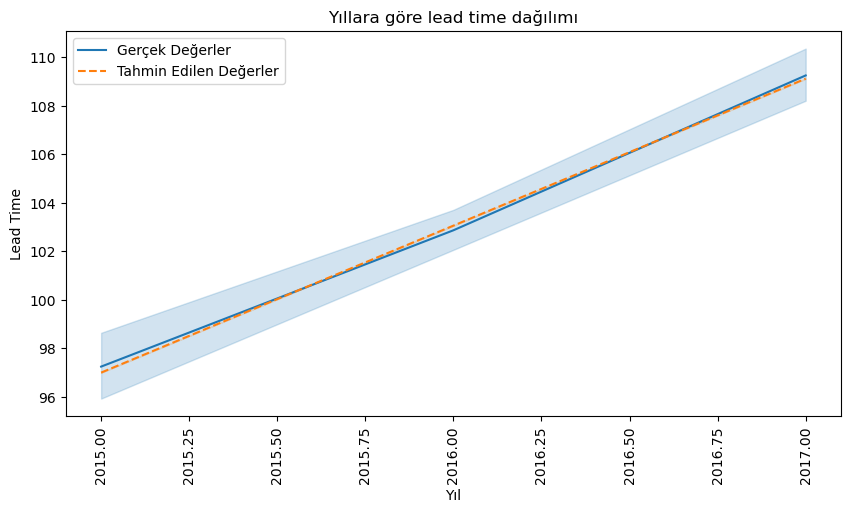

In [56]:
# Bağımsız ve bağımlı değişkenleri seçme
X = df[['arrival_date_year']]
y = df['lead_time']

# Lineer regresyon modelini oluşturma ve eğitme
model = LinearRegression()
model.fit(X, y)

# Tahminler yapma
df['predicted_lead_time'] = model.predict(X)

# Grafik oluşturma
plt.figure(figsize=(10, 5))
sns.lineplot(x="arrival_date_year", y="lead_time", data=df, label='Gerçek Değerler')
sns.lineplot(x="arrival_date_year", y="predicted_lead_time", data=df, label='Tahmin Edilen Değerler', linestyle='--')

# Grafik ayarları
plt.title("Yıllara göre lead time dağılımı")
plt.xticks(rotation=90)
plt.xlabel('Yıl')
plt.ylabel('Lead Time')
plt.legend()

# Grafiği gösterme
plt.show()

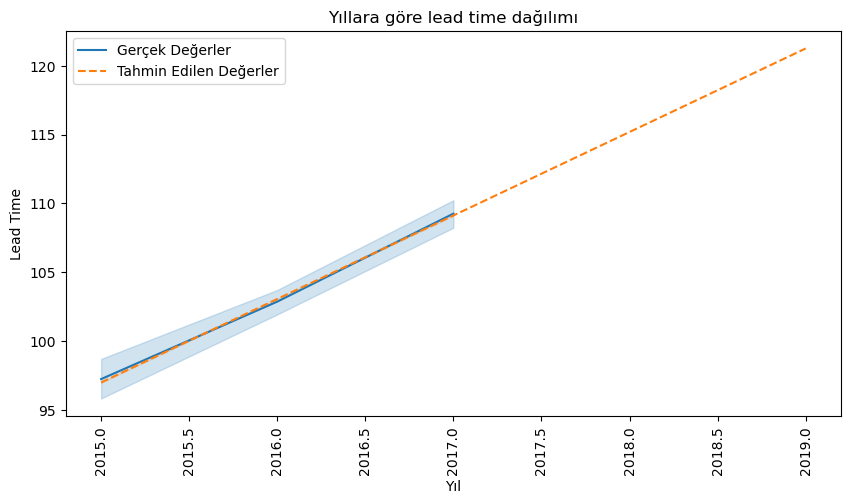

In [58]:
# Gelecekteki yıllar için tahmin yapma
future_years = pd.DataFrame({'arrival_date_year': [2017, 2018, 2019]})
future_predictions = model.predict(future_years)

# Gelecekteki tahminleri DataFrame'e ekleme
future_years['predicted_lead_time'] = future_predictions

# Mevcut verilerle gelecekteki tahminleri birleştirme
df_combined = pd.concat([df[['arrival_date_year', 'lead_time', 'predicted_lead_time']], future_years], ignore_index=True)

# Grafik oluşturma
plt.figure(figsize=(10, 5))
sns.lineplot(x="arrival_date_year", y="lead_time", data=df, label='Gerçek Değerler')
sns.lineplot(x="arrival_date_year", y="predicted_lead_time", data=df_combined, label='Tahmin Edilen Değerler', linestyle='--')

# Grafik ayarları
plt.title("Yıllara göre lead time dağılımı")
plt.xticks(rotation=90)
plt.xlabel('Yıl')
plt.ylabel('Lead Time')
plt.legend()

# Grafiği gösterme
plt.show()